# MS Topo Layer API Query

In [84]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Polygon
from osdatahub import NGD
from osdatahub import Extent
from dotenv import load_dotenv

#### Setting up the API
Location data is fetched from OS Data Hub APIs. This analysis uses Premium data from the OS Features API, so you will need a Premium account.

In [41]:
# Set API key, details from https://github.com/OrdnanceSurvey/osdatahub
load_dotenv()
key = os.environ['KEY']

In [42]:
ngd_collections = NGD.get_collections()
for collection in ngd_collections['collections']:
    print(f' - {collection["title"]} ({collection["id"]})')

 - Building Line v1 (bld-fts-buildingline-1)
 - Building Part v1 (bld-fts-buildingpart-1)
 - Named Area v1 (gnm-fts-namedarea-1)
 - Named Point v1 (gnm-fts-namedpoint-1)
 - Land v1 (lnd-fts-land-1)
 - Landform v1 (lnd-fts-landform-1)
 - Landform Line v1 (lnd-fts-landformline-1)
 - Landform Point v1 (lnd-fts-landformpoint-1)
 - Land Point v1 (lnd-fts-landpoint-1)
 - Site v1 (lus-fts-site-1)
 - Site Access Location v1 (lus-fts-siteaccesslocation-1)
 - Site Routing Point v1 (lus-fts-siteroutingpoint-1)
 - Compound Structure v1 (str-fts-compoundstructure-1)
 - Structure v1 (str-fts-structure-1)
 - Structure Line v1 (str-fts-structureline-1)
 - Structure Point v1 (str-fts-structurepoint-1)
 - Cartographic Rail Detail v1 (trn-fts-cartographicraildetail-1)
 - Rail v1 (trn-fts-rail-1)
 - Road Line v1 (trn-fts-roadline-1)
 - Road Track Or Path v1 (trn-fts-roadtrackorpath-1)
 - Connecting Link v1 (trn-ntwk-connectinglink-1)
 - Connecting Node v1 (trn-ntwk-connectingnode-1)
 - Ferry Link v1 (trn-

#### Fetching Data

In [102]:
crs = "EPSG:27700"
collection = "str-fts-structureline-1"
ngd_building_part = NGD(key, collection)

# make the query and contact the API
extent = Extent.from_bbox((421000, 368000,
                           422000, 369000), crs=crs)
features = ngd_building_part.query(extent=extent, max_results=100000)

#### Process the data 

In [103]:
gdf = gpd.GeoDataFrame.from_features(features, crs=crs)
gdf.head(2)

,geometry,osid,toid,theme,istidal,changetype,ishistoric,isobscured,description,versiondate,...,operationalstatus,description_source,geometry_updatedate,capturespecification,geometry_evidencedate,description_updatedate,versionavailabletodate,firstdigitalcapturedate,description_evidencedate,versionavailablefromdate
0,"LINESTRING (-1.680 53.214, -1.680 53.214, -1.6...",000a9a20-d926-4972-9fe1-191e06d6ec59,osgb1000000099031269,Structures,False,New,False,False,Built Obstruction,2022-08-26,...,Unknown,Ordnance Survey,2004-06-12,Rural,2004-06-12,2004-06-12,None,1992-08-11,2004-06-12,2022-08-27T00:00:00Z
1,"LINESTRING (-1.686 53.217, -1.686 53.217)",001cce79-60ac-40cc-bbc3-2a2b95102b43,osgb1000000099028847,Structures,False,New,False,False,Built Obstruction,2022-08-26,...,Unknown,Ordnance Survey,2004-06-12,Rural,2004-06-12,2004-06-12,None,1992-08-11,2004-06-12,2022-08-27T00:00:00Z


(Text(0.5, 152.20710975756066, 'Eastings'), Text(61.875, 0.5, 'Northings'))

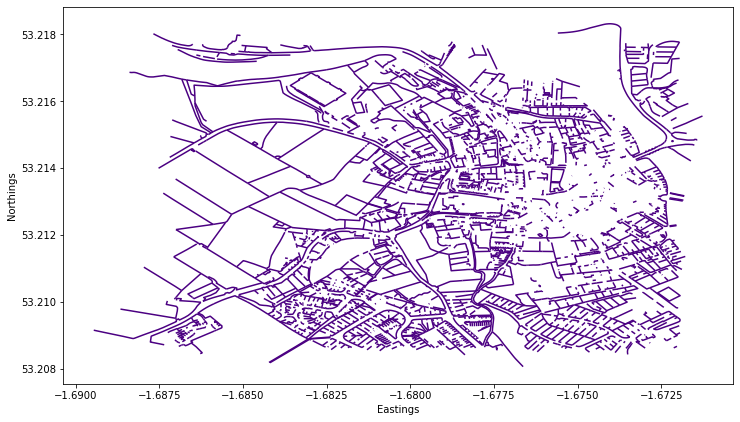

In [104]:
ax = gdf.plot(color="indigo", figsize=(12, 10))
ax.set_xlabel("Eastings"), ax.set_ylabel("Northings")

In [105]:
# save as a new file 
out_file_path = r"../content/ngd_boundaries/structureline_wp.shp"
gdf.to_file(out_file_path)

C:\Users\alexad\AppData\Local\Temp\ipykernel_17332\1804561445.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(out_file_path)
